In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
dataframe = pd.read_csv('pakwheels_used_car_data_v02.csv')
dataframe.head()

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
0,7943732,Peshawar,NaN,Sedan,Toyota,Corolla,2013.0,1300.0,Manual,Petrol,Silver Metallic,Lahore,145000,2870000.0
1,7730314,Lahore,NaN,Sedan,Honda,City,2000.0,1300.0,Manual,Petrol,Blue,Lahore,230000,995000.0
2,7943737,Lahore,NaN,Sedan,Toyota,Yaris,2021.0,1300.0,Manual,Petrol,Super White,Punjab,60500,3585000.0
3,7943733,Lahore,NaN,Hatchback,Suzuki,Swift,2017.0,1300.0,Manual,Petrol,Grey,Islamabad,87000,2250000.0
4,7923484,Lahore,NaN,Sedan,Honda,Civic,2017.0,1800.0,Automatic,Petrol,Grey,Lahore,86000,4850000.0


In [3]:
car_dataframe = dataframe[['year', 'engine', 'mileage', 'price']].copy()

In [4]:
car_dataframe['mileage'] = pd.to_numeric(car_dataframe['mileage'], errors='coerce')

In [5]:
car_dataframe.dropna(inplace=True)

In [6]:
X = car_dataframe[['year', 'engine', 'mileage']]   # Input features
y = car_dataframe['price']  #target Variables

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
print("Model Coefficients (w):", model.coef_)
print("Model Intercept (b):", model.intercept_)

Model Coefficients (w): [ 2.25388130e+05  4.07562487e+03 -4.16404208e+00]
Model Intercept (b): -455160491.8772486


In [10]:
y_pred = model.predict(X_test)

In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

In [12]:
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 16985223557196.836
R² Score: 0.39666478608065714


In [13]:
predicted_price = model.predict([[2018, 1800, 50000]])
print("Predicted price for 2018 model, 1800cc, 50000 km:", predicted_price[0])

Predicted price for 2018 model, 1800cc, 50000 km: 6800677.224557817


C:\Users\Super\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


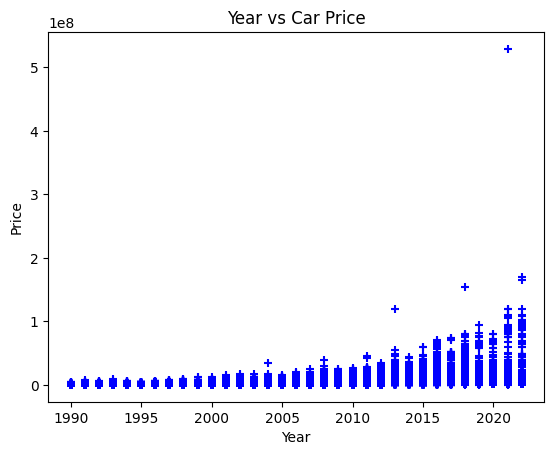

In [14]:
plt.scatter(car_dataframe['year'], car_dataframe['price'], color='blue', marker='+')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Year vs Car Price')
plt.show()